## NAMA: Muhammad Alpi Ashari
## NIM: 2209106017
## Kelas: A1 2022
# POSTTEST 5 KB
# ________________________________________________________________________________________

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# A. Supervised Learning

#### Kita lakukan import library numpy, pandas, matplotlip dan sklearn

In [29]:
alpi = pd.read_csv('smoking.csv')
alpi.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


#### Kita lakukan pemanggilan dataset dan kita tampilkan agar kita tau isi dari recordnya

In [24]:
X = alpi[['age', 'height(cm)','weight(kg)']]
y = alpi['smoking']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Pisahkan data menjadi data pelatihan(X) dan pengujian(y)

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#### kita Membuat model Linear Regression, Melatih model pada data pelatihan dan Melakukan prediksi pada data pengujian

In [26]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 0.193595004529464
R-squared (R²): 0.168689061445363


#### kita melakukan Evaluasi model, menampilkan Mean Squared Error dan R-squared

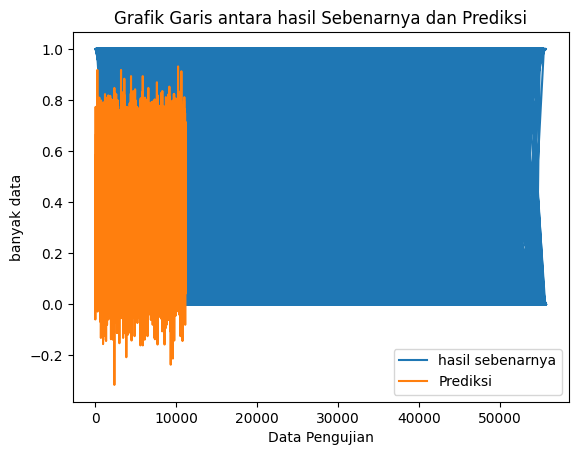

In [27]:
plt.plot(y_test, label="hasil sebenarnya")
plt.plot(y_pred, label="Prediksi")
plt.xlabel("Data Pengujian")
plt.ylabel("banyak data")
plt.legend()
plt.title("Grafik Garis antara hasil Sebenarnya dan Prediksi")
plt.show()

#### kegunaannya untuk membuat grafik garis yang membandingkan hasil sebenarnya dengan hasil prediksi da data pengujian. dan ternyata hasil sebenarnya jauh lebih tinggi hingga mencapai 1.0 dengan banyak data pengujian melewati 50000 keatas, sedangkan prediksi kita hanya melewati 0.8 (tidak sampai 1.00) dengan banyak data tidak sampai 20000

# B. Unsupervised Learning

In [62]:
K = 3
X = alpi[['age', 'smoking']]

#### Kita memiliki target jumlah cluster (K) sebanyak 3, dan pada X nya kita menggunakakan label age dan smoking

In [63]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### 

In [64]:
kmeans = KMeans(n_clusters=K)
kmeans.fit(X_scaled)

C:\Users\praktek\Documents\venv_A1_22\joy_014\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

#### code diatas digunakan untuk melakukan clustering data dan analisis data menggunakan algoritma K-Means

In [65]:
labels = kmeans.labels_
cluster_counts = pd.Series(labels).value_counts().sort_index()

#### Kode ini digunakan untuk menghitung jumlah data dalam setiap cluster yang telah dihasilkan oleh algoritma K-Means dan mengurutkannya berdasarkan label cluster. 

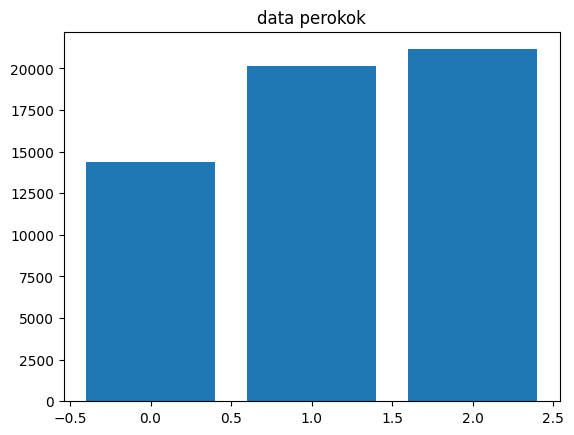

In [67]:
plt.bar(cluster_counts.index, cluster_counts.values, )
plt.title('data perokok')
plt.show()

#### Disini kita tampilkan 3 data hasil kmeans, ternyata kita liat grafiknya menaik dan dapat disimpulkan kalau jumlah perokok masih banyak dan selalu mengalami peningkatan.